<a href="https://colab.research.google.com/github/ingridpacheco/Risk-Analysis/blob/master/Lista05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
generateLogReturn <- function(id) {
  csvName <- "PETR4.SA.csv"
  if (id == "VALE") {
    csvName <- "VALE.csv"
  }
  if (id == "ITUB") {
    csvName <- "ITUB.csv"
  }
  values<-read.csv(csvName,sep=';',dec='.')
  plot(values$Close,type='l')
  lnClose<-log(values$Close)
  lnClose
}

In [2]:
getStatistics <- function(lnClose) {
  retCC<-diff(lnClose)
  hist(retCC)
  mu<-mean(retCC)
  sigma<-sd(retCC)
  c(mu,sigma)
}

In [3]:
getInfo <- function(id) {
  lnClose <- generateLogReturn(id)
  statistics <- getStatistics(lnClose)
  len <- length(lnClose)
  c(lnClose[len],statistics)
}

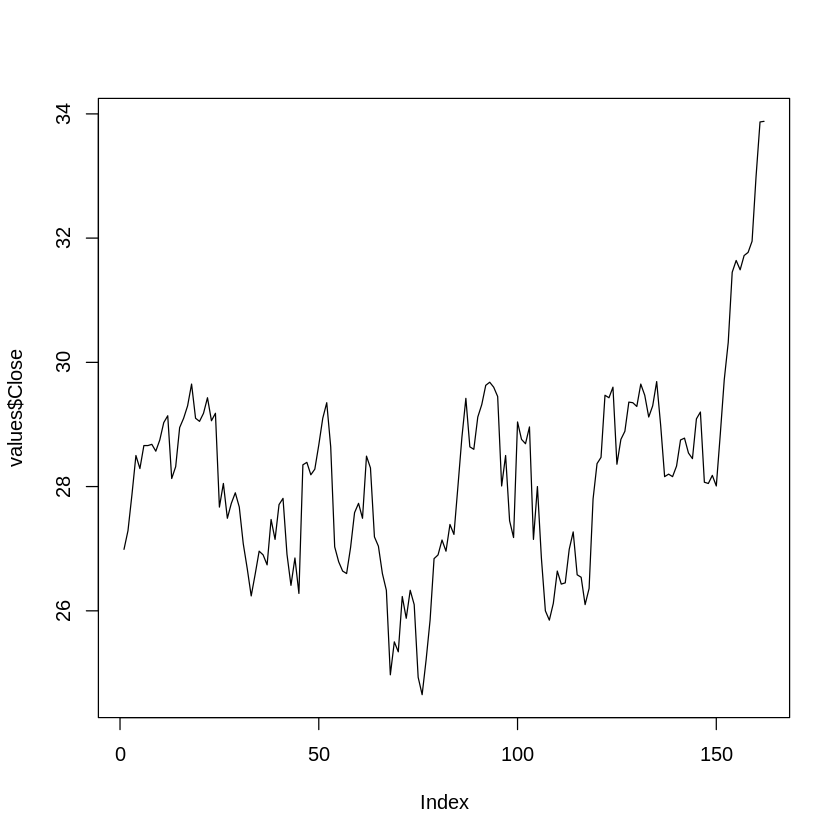

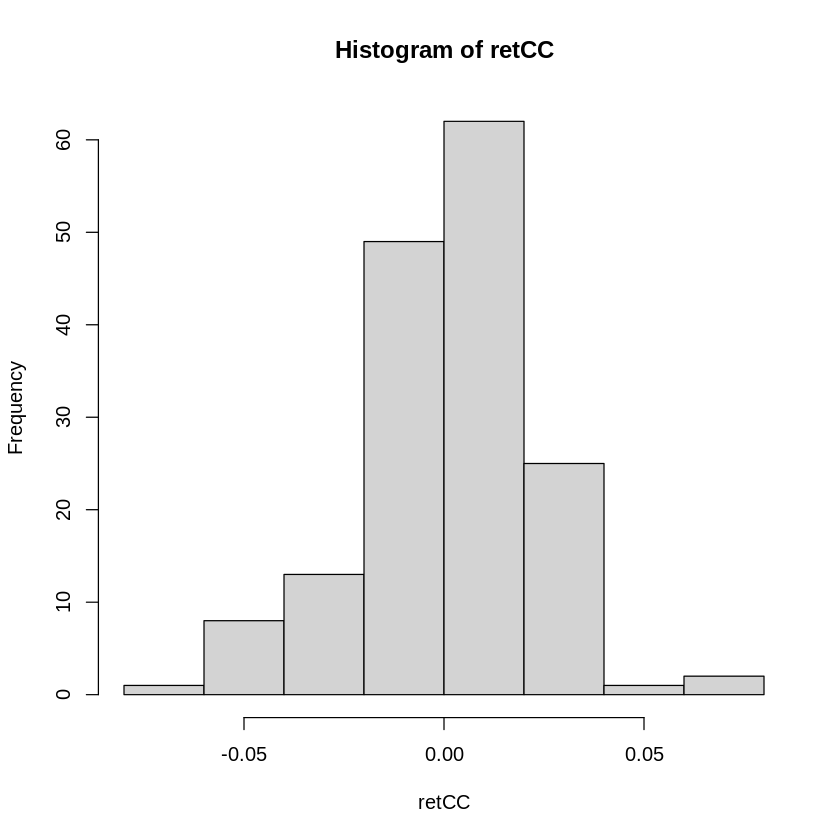

In [4]:
# Calculate Petrobras
petroLog <- generateLogReturn("PETR4.SA")
petroInfo <- getStatistics(petroLog)

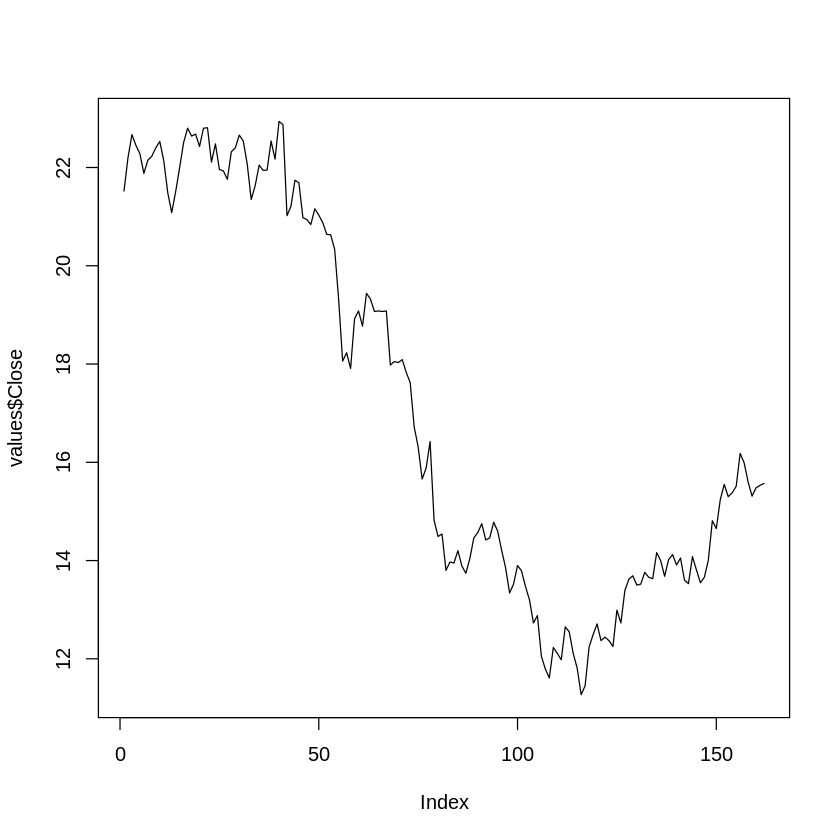

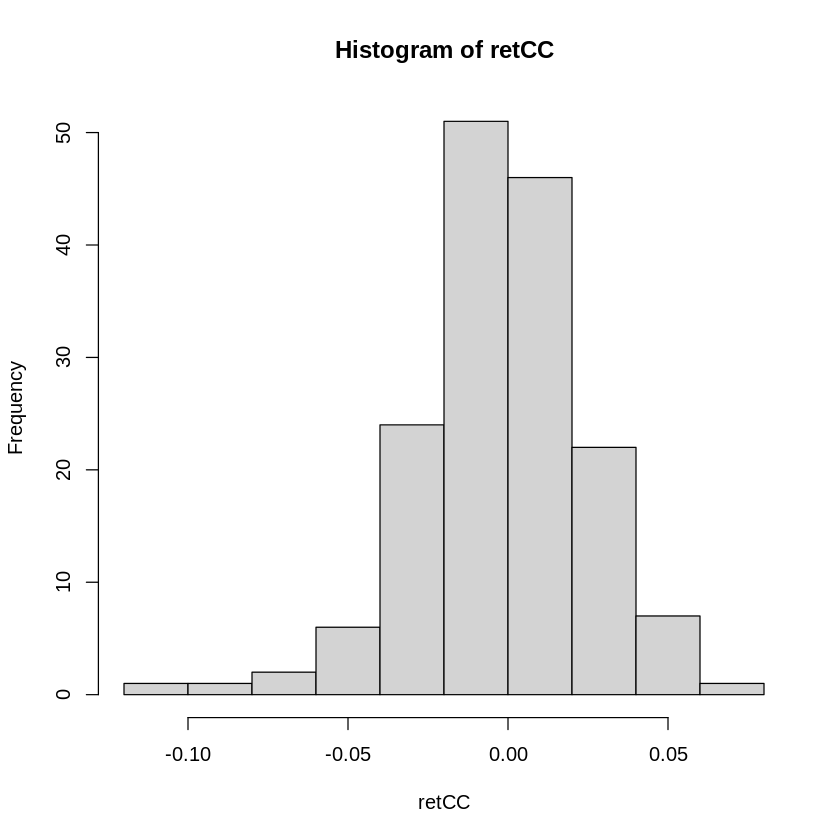

In [5]:
# Calculate Vale
valeLog <- generateLogReturn("VALE")
valeInfo <- getStatistics(valeLog)

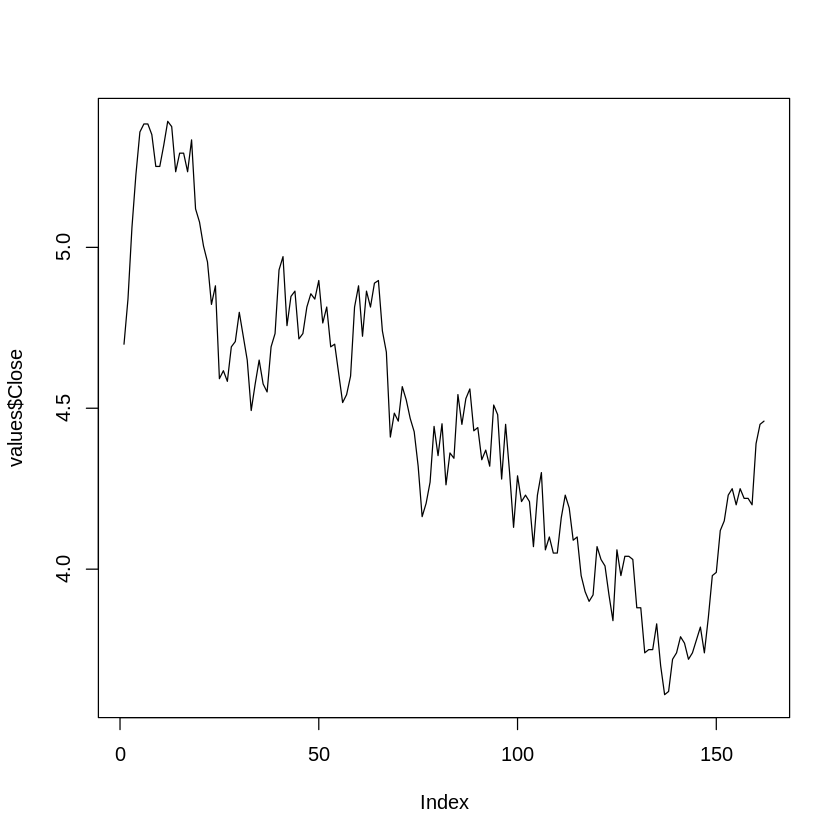

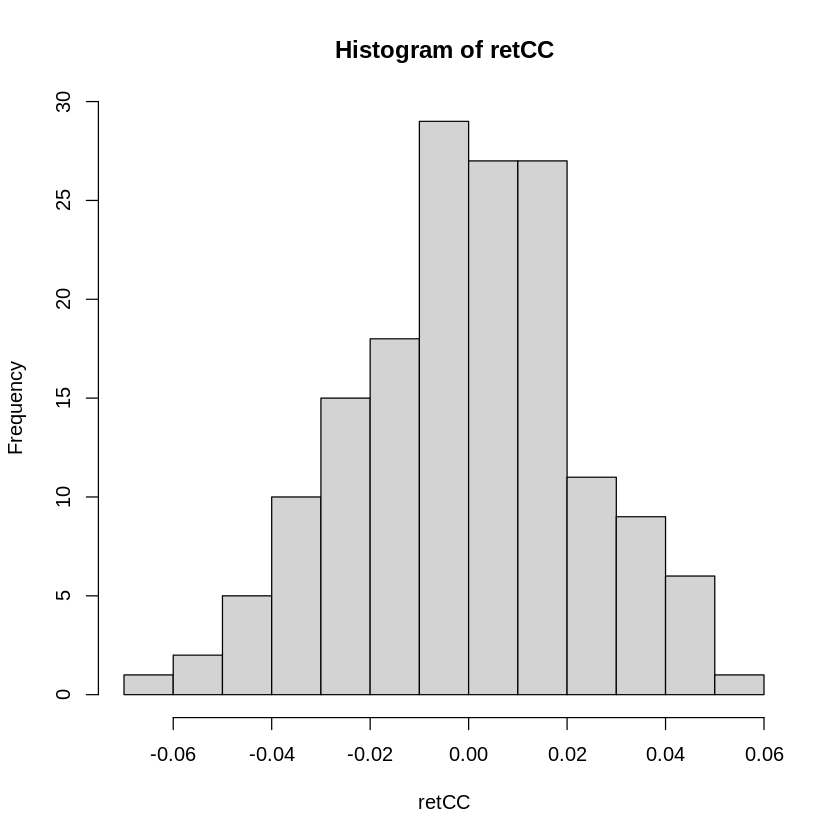

In [6]:
# Calculate Itau
itauLog <- generateLogReturn("ITUB")
itauInfo <- getStatistics(itauLog)

In [7]:
library(MASS)

In [8]:
# Calculate covariance matrix and return matrix of normal distribution
getCovMatrix <- function(Ns = 1000) {
  plot(petroLog,valeLog,main = paste('var(petro)=',(var(petroLog)),'\n',
                                     'var(vale)=',(var(valeLog)),'\n',
                                     'cov(petro,vale)=',(cov(petroLog,valeLog))))
  
  plot(petroLog,itauLog,main = paste('var(petro)=',(var(petroLog)),'\n',
                                     'var(itau)=',(var(itauLog)),'\n',
                                     'cov(petro,itau)=',(cov(petroLog,itauLog))))
  
  plot(itauLog,valeLog,main = paste('var(itau)=',(var(itauLog)),'\n',
                                    'var(vale)=',(var(valeLog)),'\n',
                                    'cov(itau,vale)=',(cov(itauLog,valeLog))))
  
  petr_var <- var(petroLog)
  vale_var<- var(valeLog)
  itub_var<- var(itauLog)
  x <- cov(petroLog,valeLog)
  y <- cov(petroLog,itauLog)
  z <- cov(itauLog,valeLog)
  
  ma <- matrix(c(petr_var,x,y, x,vale_var,z, z, y,itub_var), ncol = 3)

  # Other way to find covariance matrix
  #M <- cbind(petroLog,valeLog,itauLog)
  #ma <- cov(M)

  x<-mvrnorm(Ns,mu=c(0,0,0),Sigma=ma)
  
  if (Ns > 1){
    plot(x[,1],x[,2],xlab='X',ylab='Y',main='Rho')
    abline(lm(x[,2]~x[,1]),col='red')
  }
  x
}

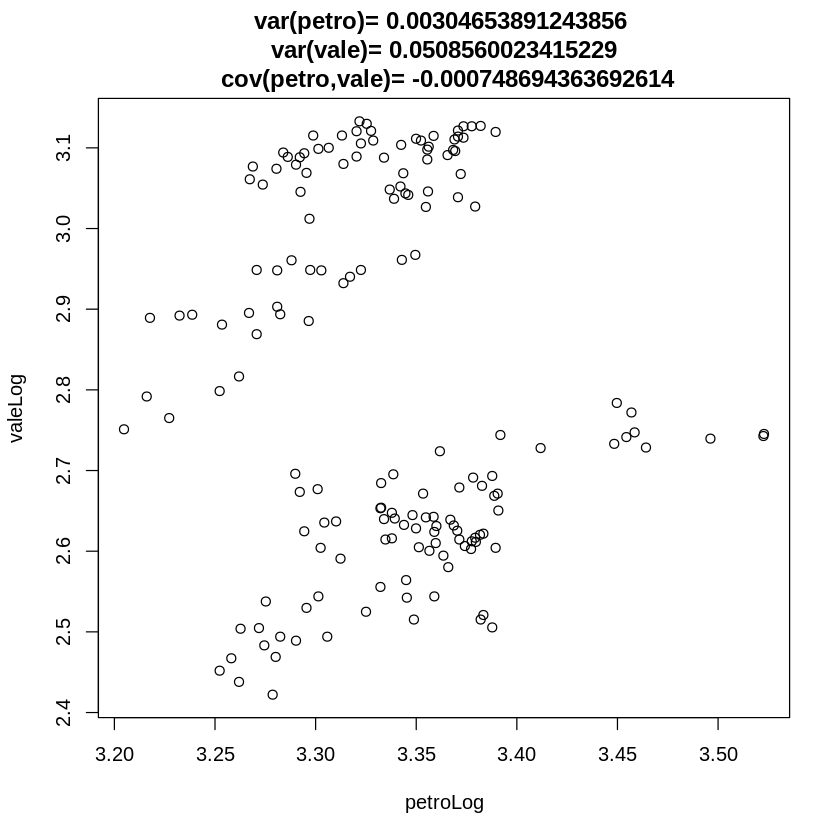

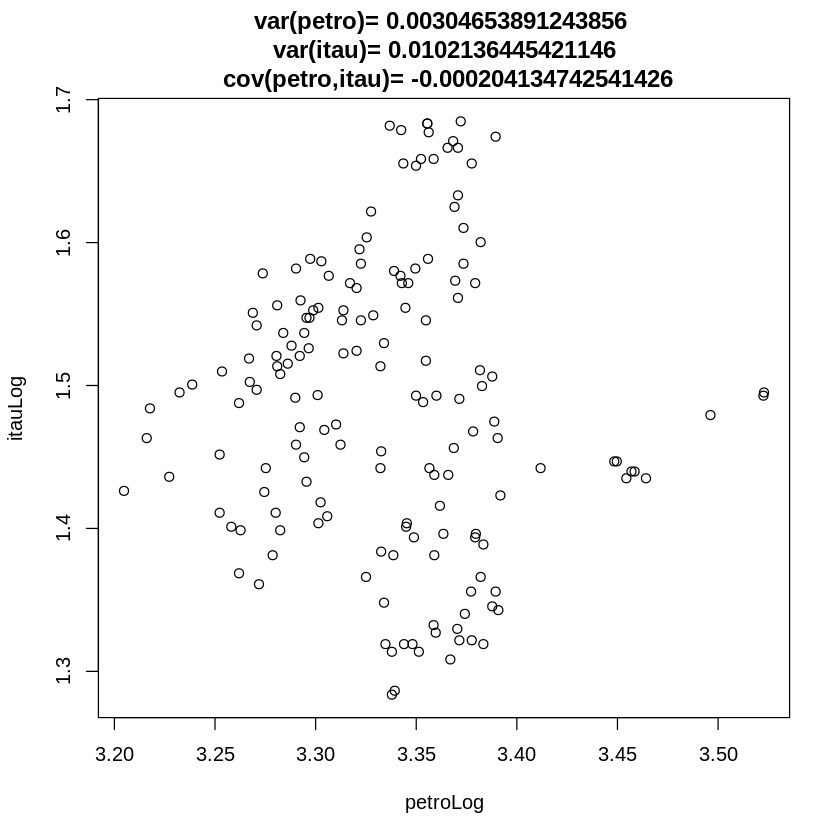

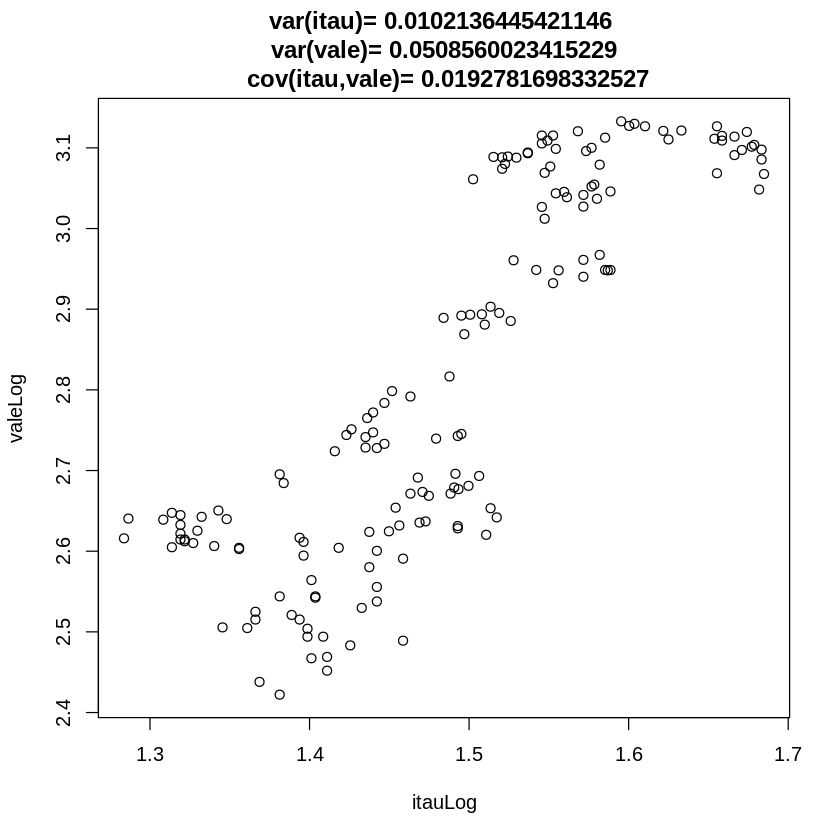

0.042563503,-0.109635205,-0.119786489
-0.049187686,0.099335578,0.002050348
0.022767725,0.112057214,-0.055759175
0.029548933,0.249540008,0.111224605
-0.027683868,0.083117946,0.028808840
-0.026436527,-0.370884727,-0.216572902
0.122416109,0.272893678,0.054689110
0.046120930,-0.155349801,-0.039912763
-0.028230931,0.043195132,0.017537288
-0.049493304,0.157994493,0.002716489
-0.039883451,0.272059106,0.115521777


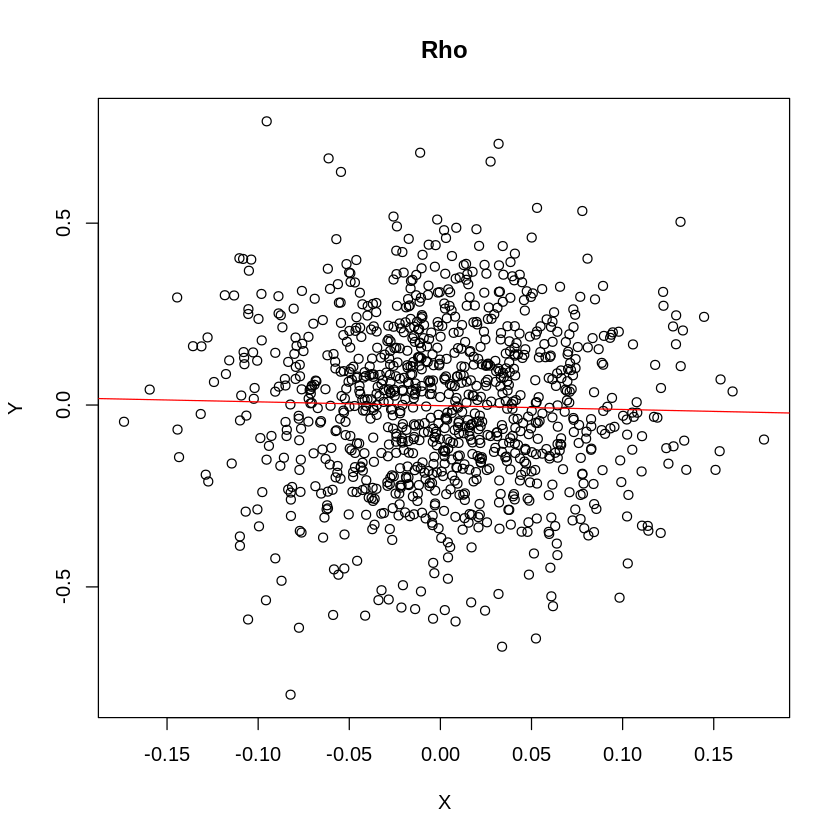

In [9]:
getCovMatrix()

In [10]:
q1 <- function(id, day, Ns=1000) {
  stock <- getInfo(id)
  today <- stock[1]
  mu <- stock[2]
  sigma <- stock[3]
  retEst<-vector(length = day)
  valEndDay<-vector(length = Ns)
  for(j in 1:Ns){
    retEst[1]<-today
    for ( i in 2:day){
      retEst[i]<-retEst[i-1]+rnorm(1,mu,sigma)
    }
    #in this case, save only last element of path
    valEndDay[j]<-retEst[day]
  }
  
  priceEndDay<-exp(valEndDay)
  hist(priceEndDay)
  plot(ecdf(priceEndDay))
}

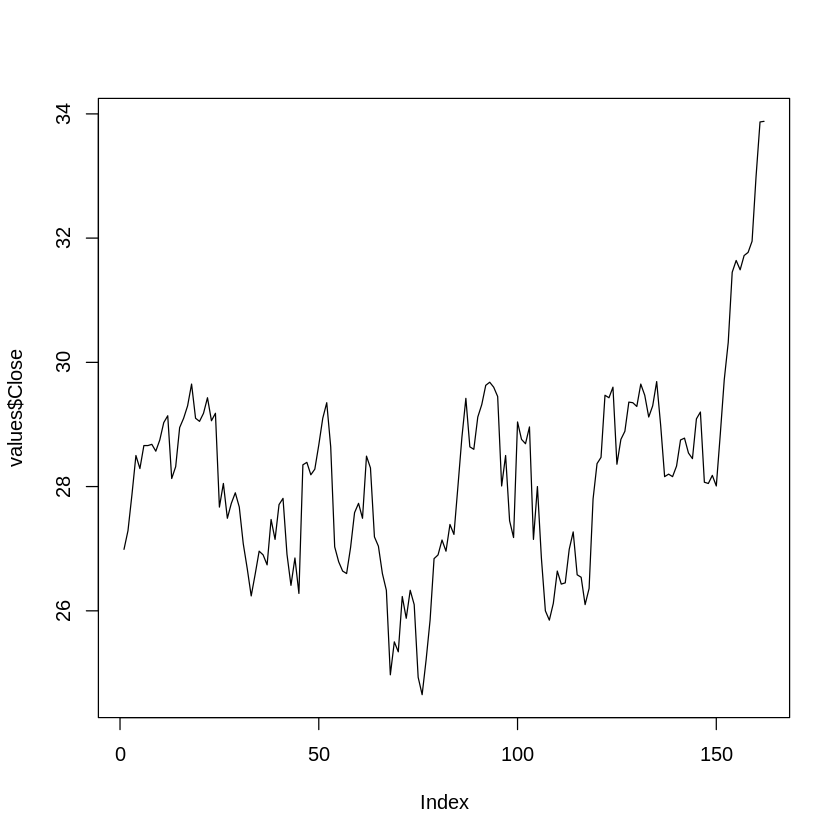

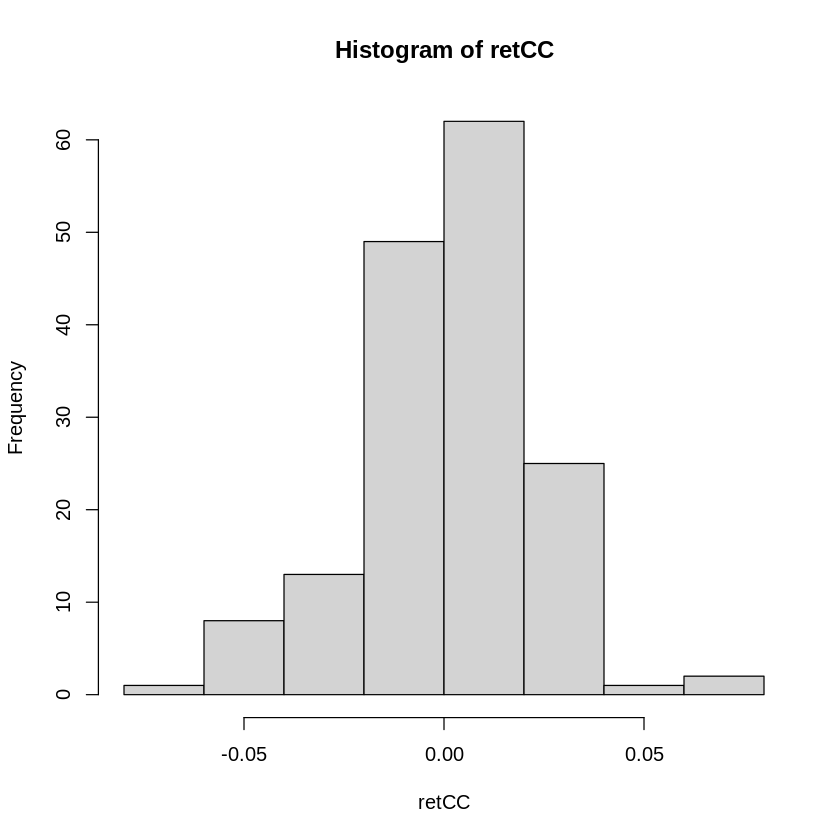

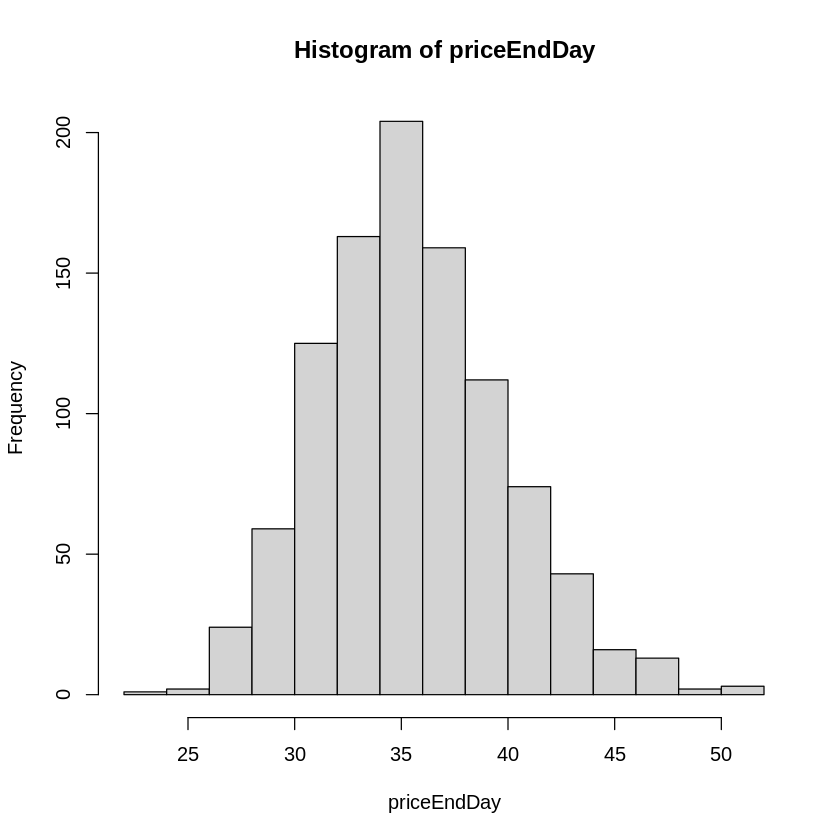

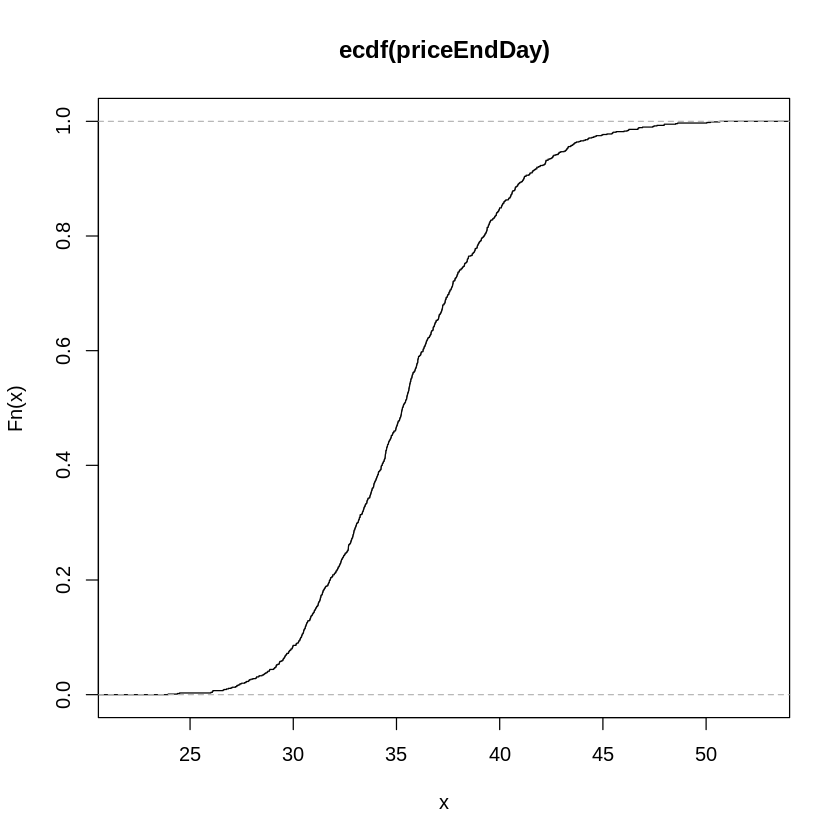

In [11]:
q1("PETR4",30)

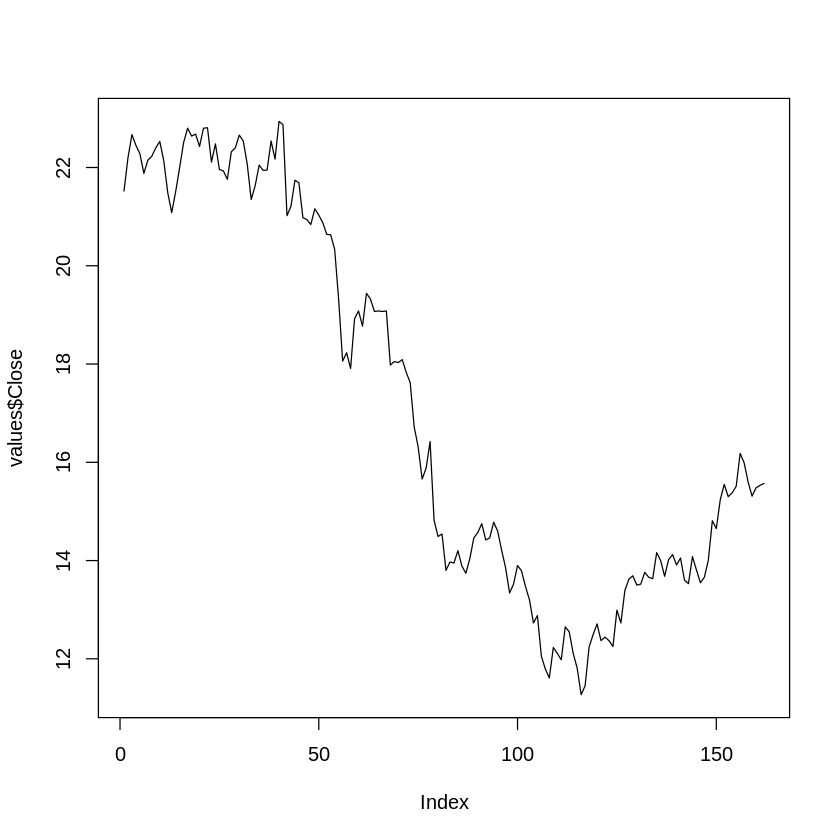

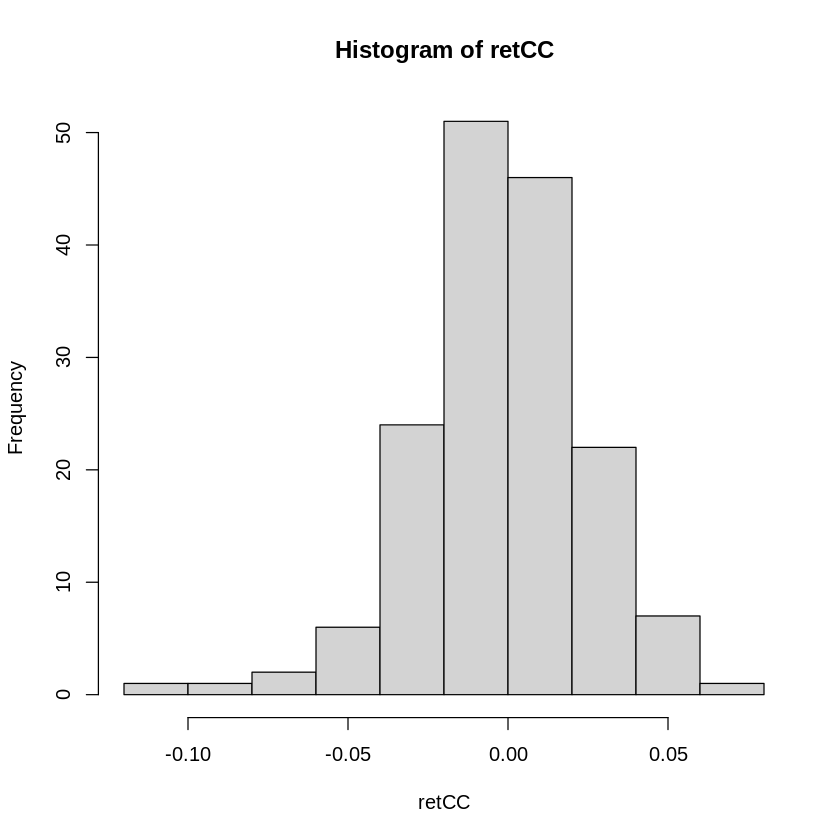

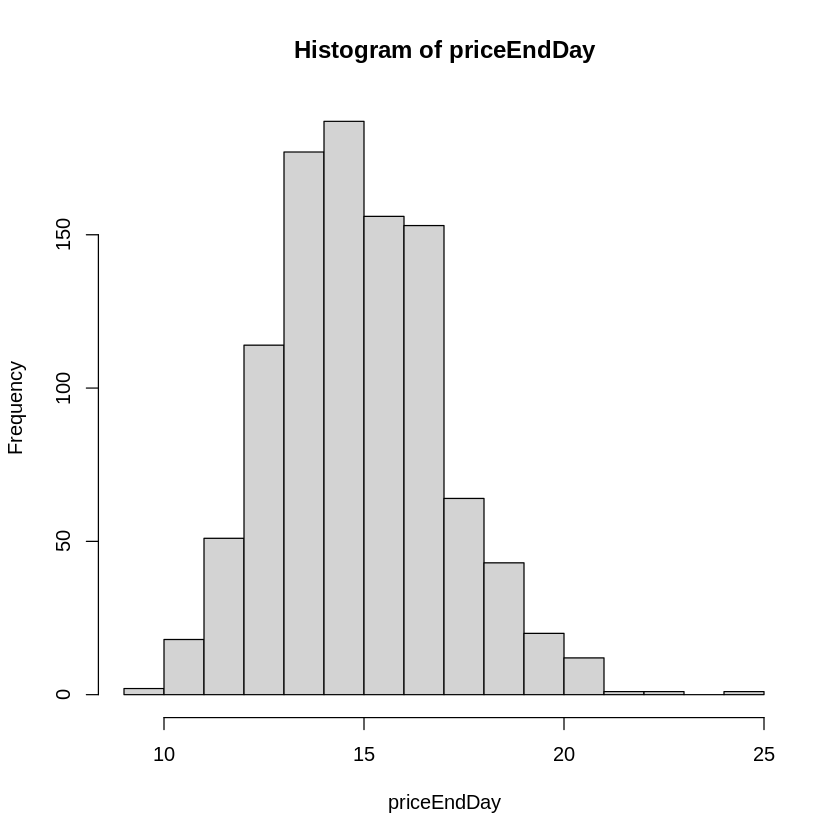

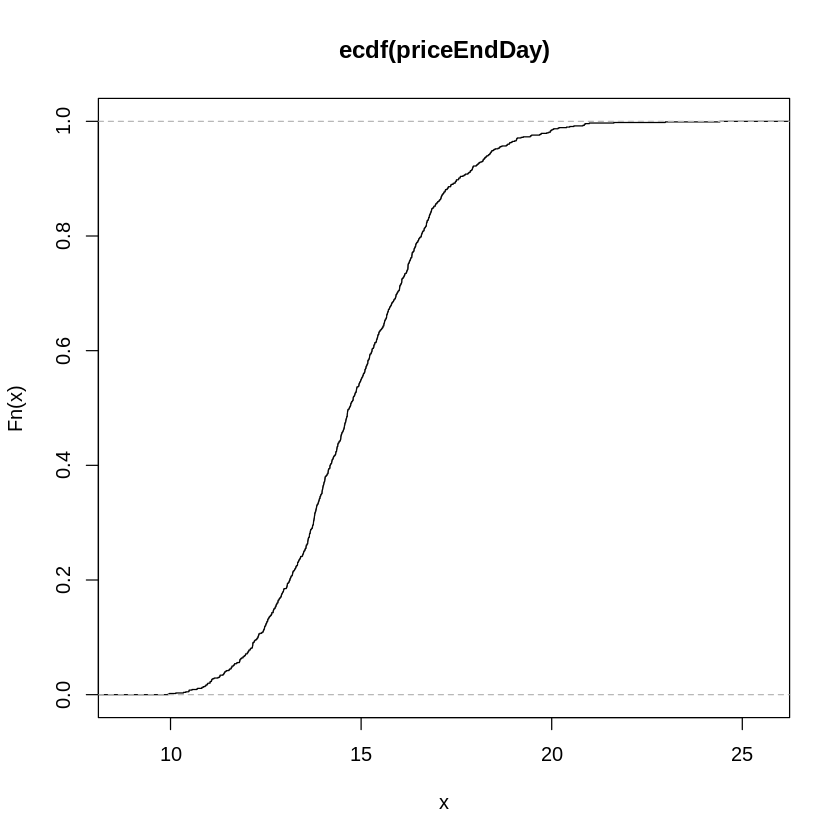

In [12]:
q1("VALE",30)

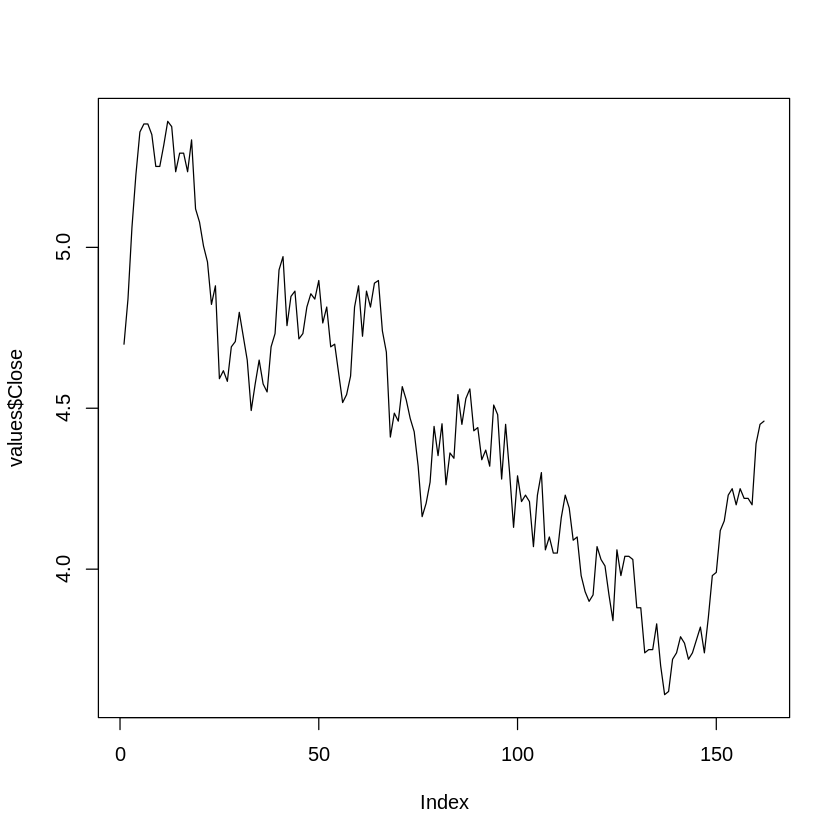

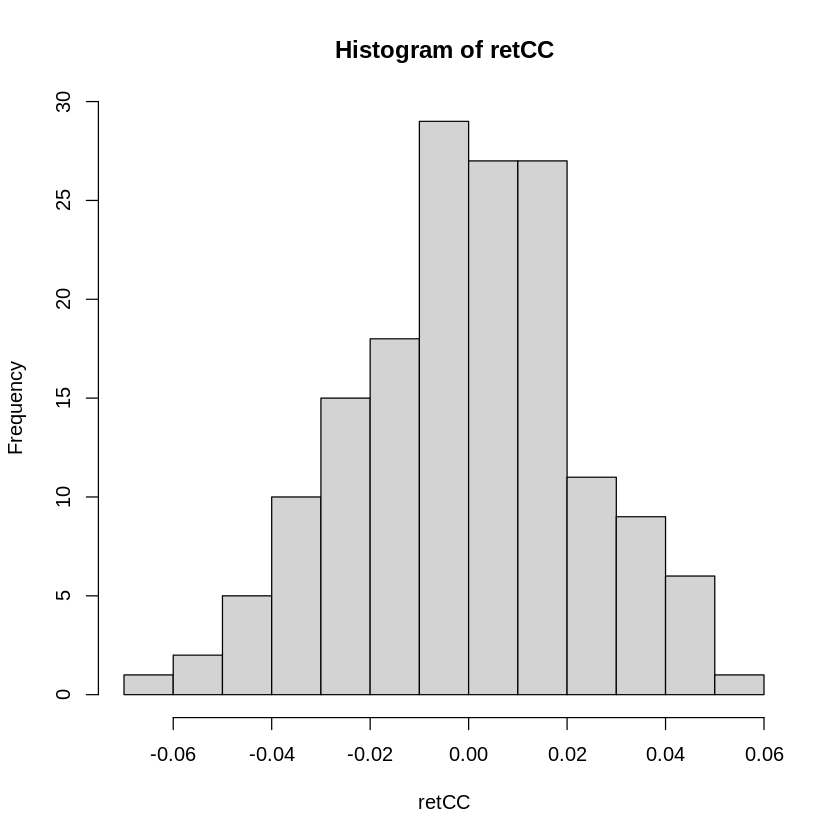

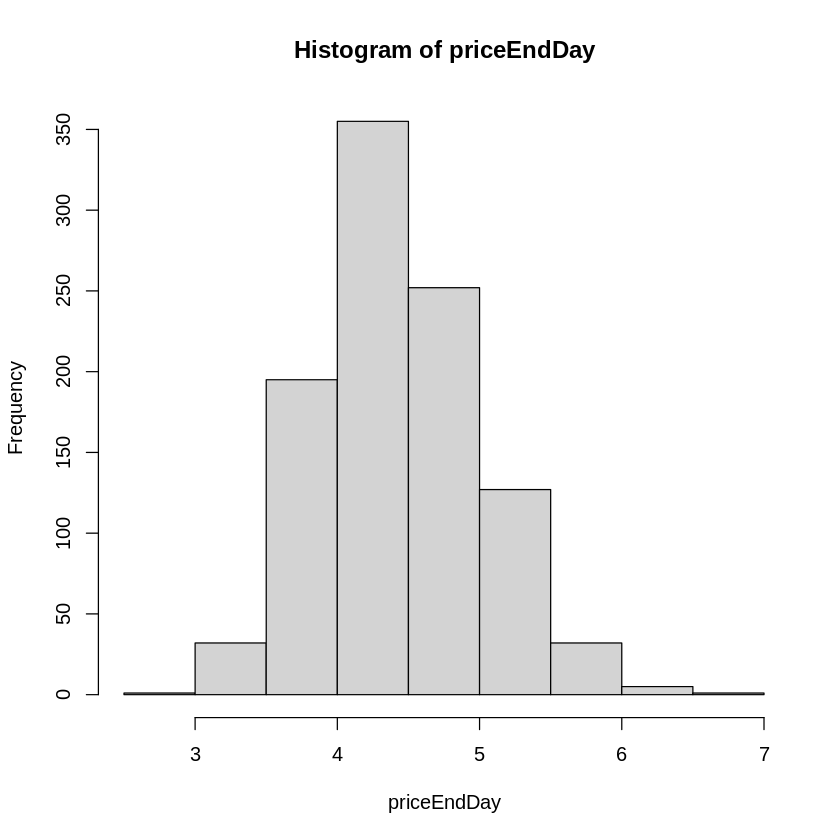

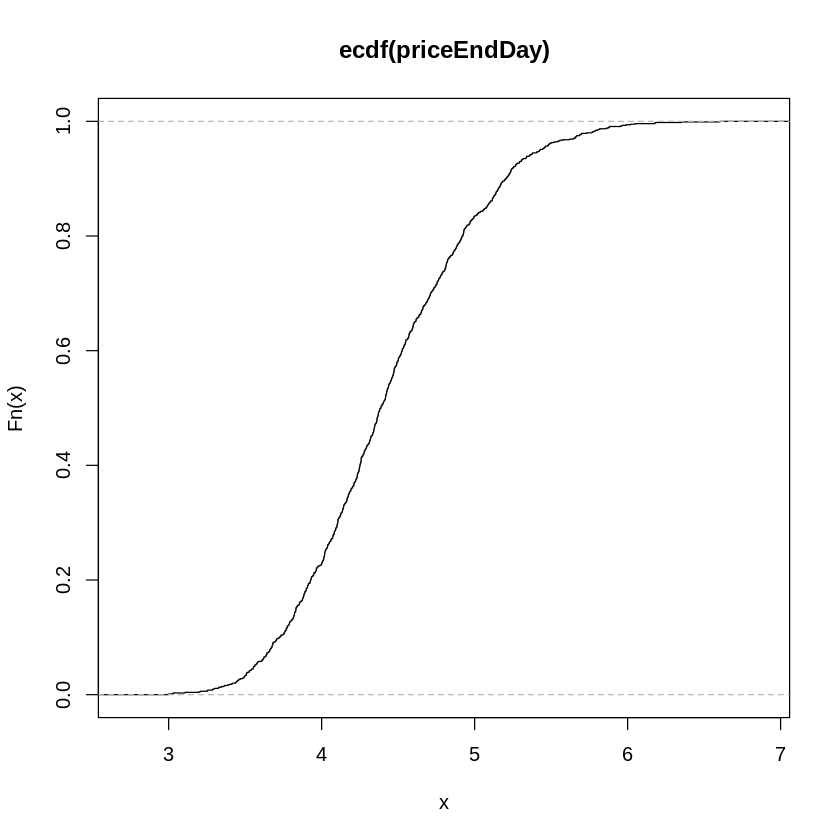

In [13]:
q1("ITUB",30)

In [14]:
q2 <- function(qP,qV,qI,days,Ns=1000) {
  petro <- getInfo("PETR4")
  petroValue <- petro[1]
  
  vale <- getInfo("VALE")
  valeValue <- vale[1]
  
  itau <- getInfo("ITUB")
  itauValue <- itau[1]
  
  retEst<-vector(length = days)
  valEndDay<-vector(length = Ns)
  mn <- getCovMatrix()
  
  for(j in 1:Ns){
    print(j)
    retEst[1] <- qP * petroValue + qV * valeValue + qI * itauValue
    for ( i in 2:days){
      newValue <- qP * mn[j,1] + qV * mn[j,2] + qI * mn[j,3]
      retEst[i]<-retEst[i-1]+newValue
    }
    #in this case, save only last element of path
    valEndDay[j]<-retEst[days]
  }
  
  priceEndDay<-exp(valEndDay)
  hist(priceEndDay)
  plot(ecdf(priceEndDay))
}

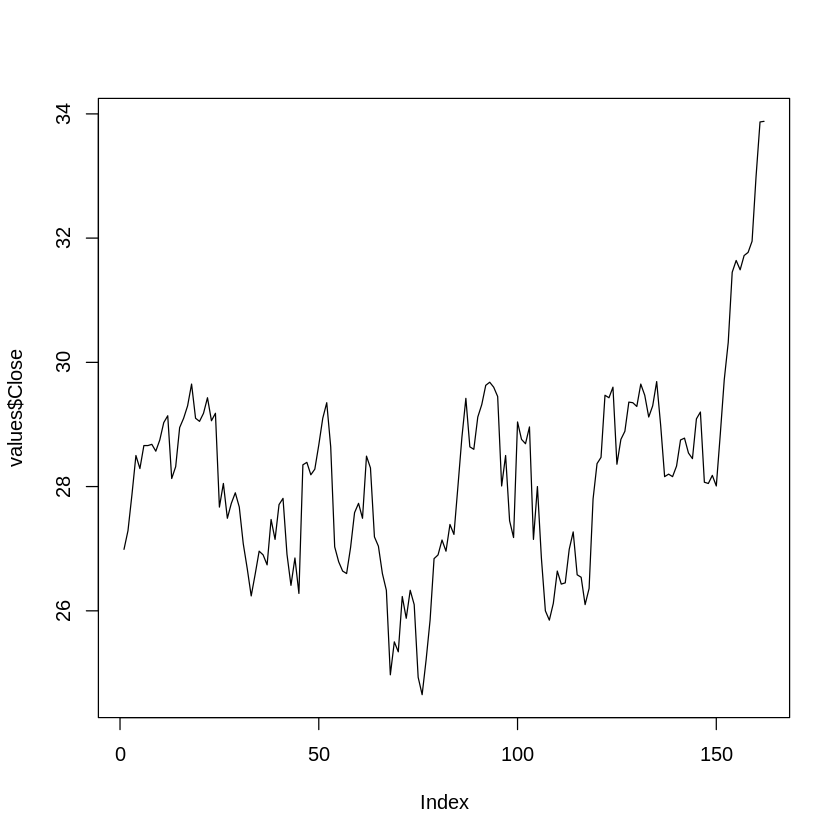

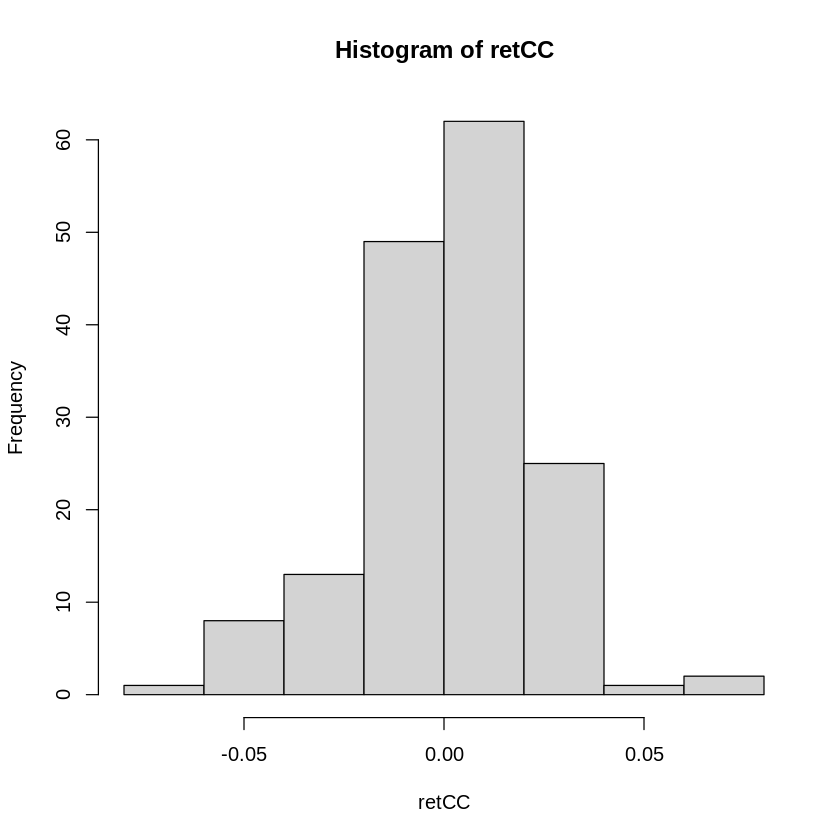

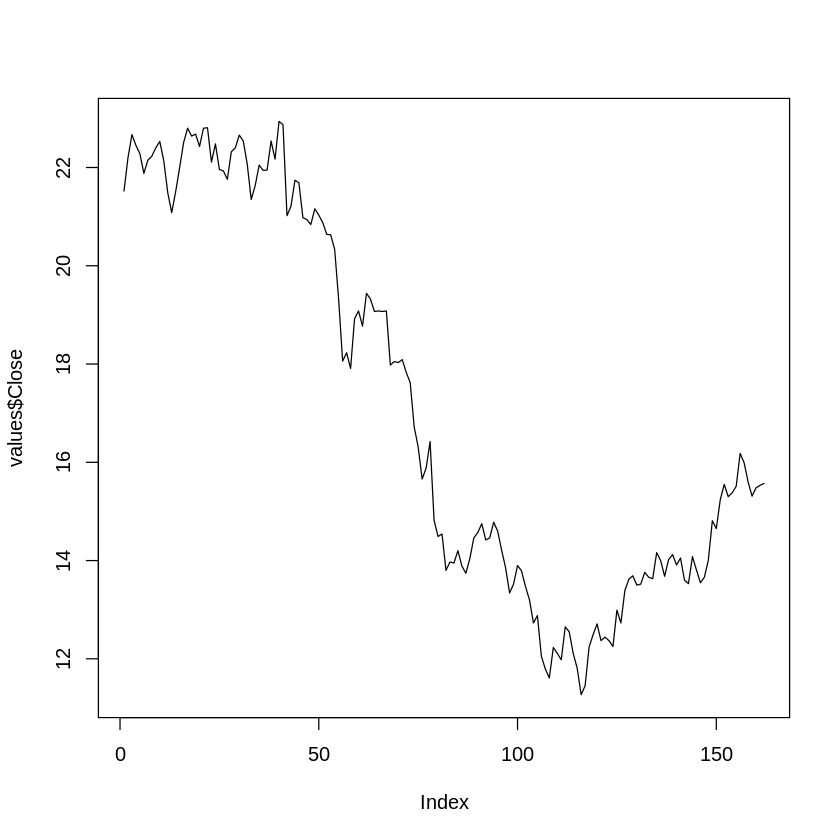

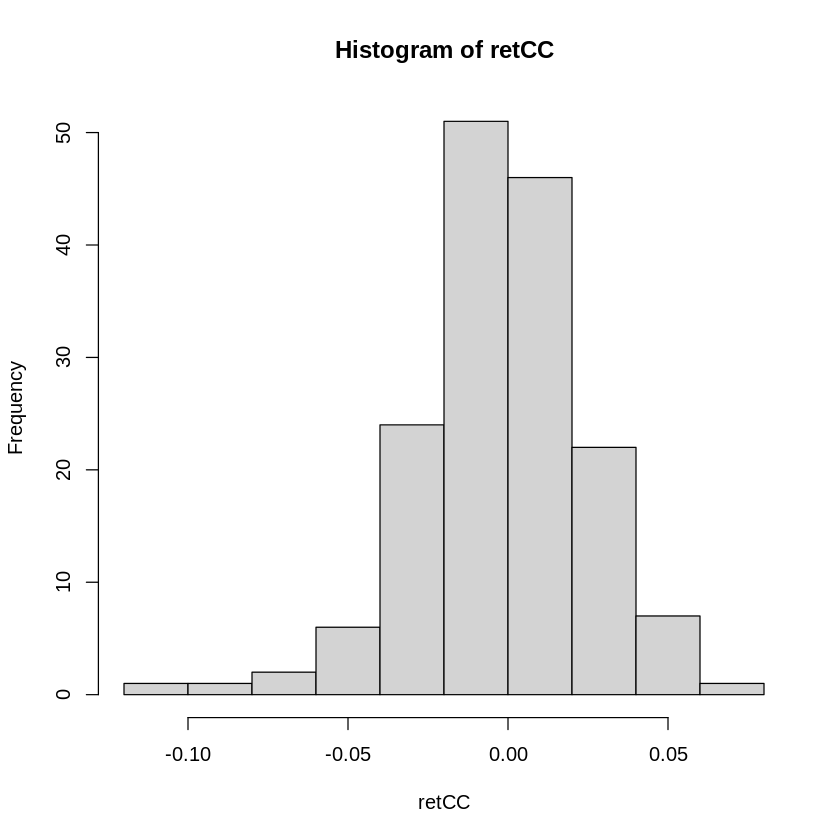

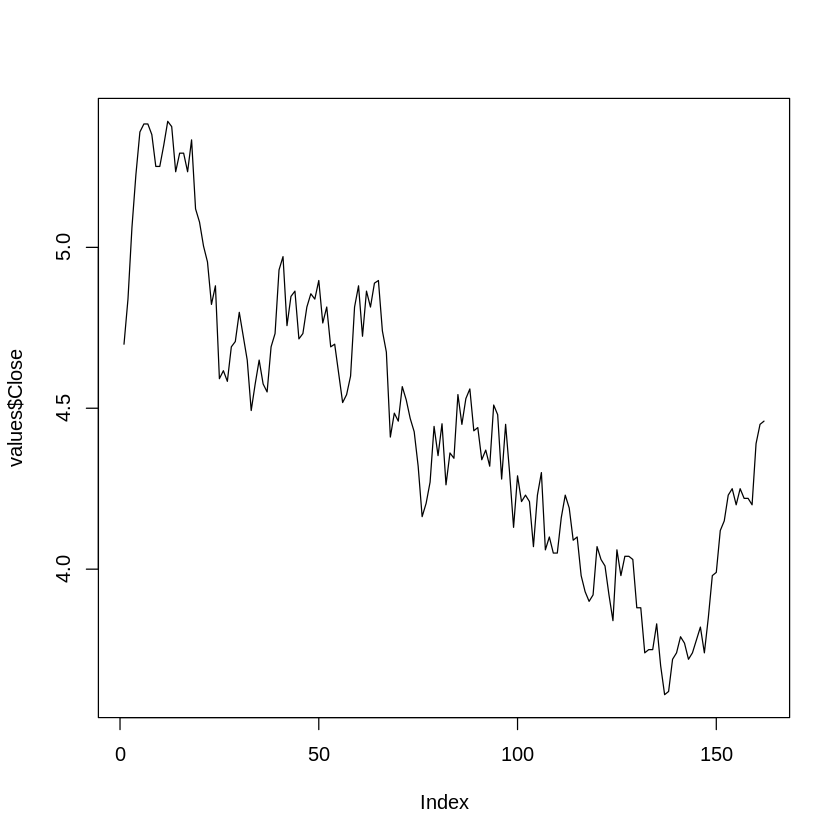

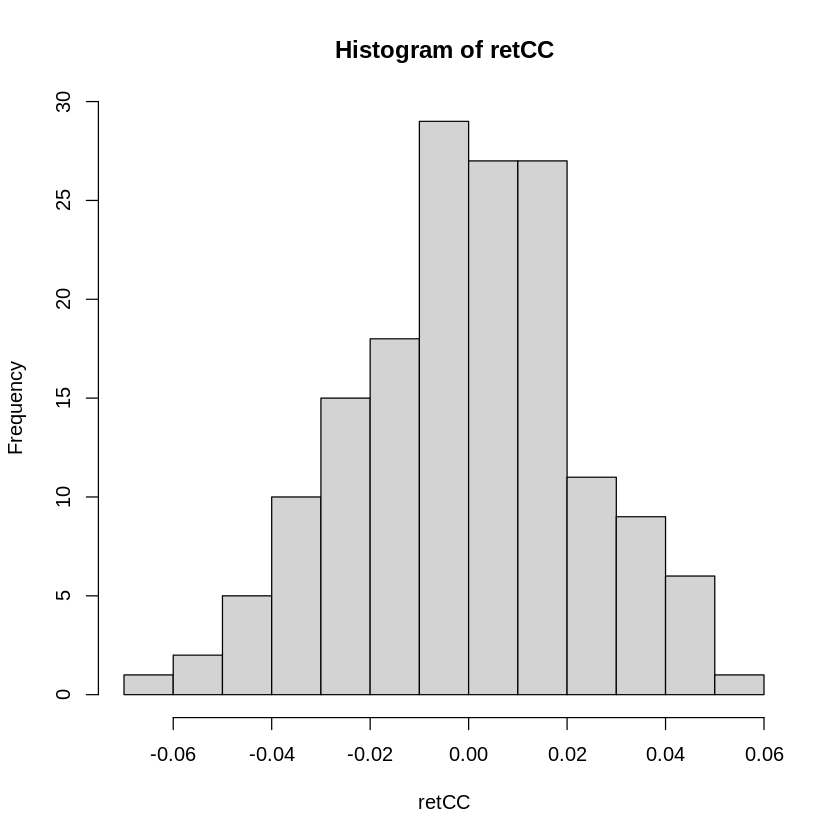

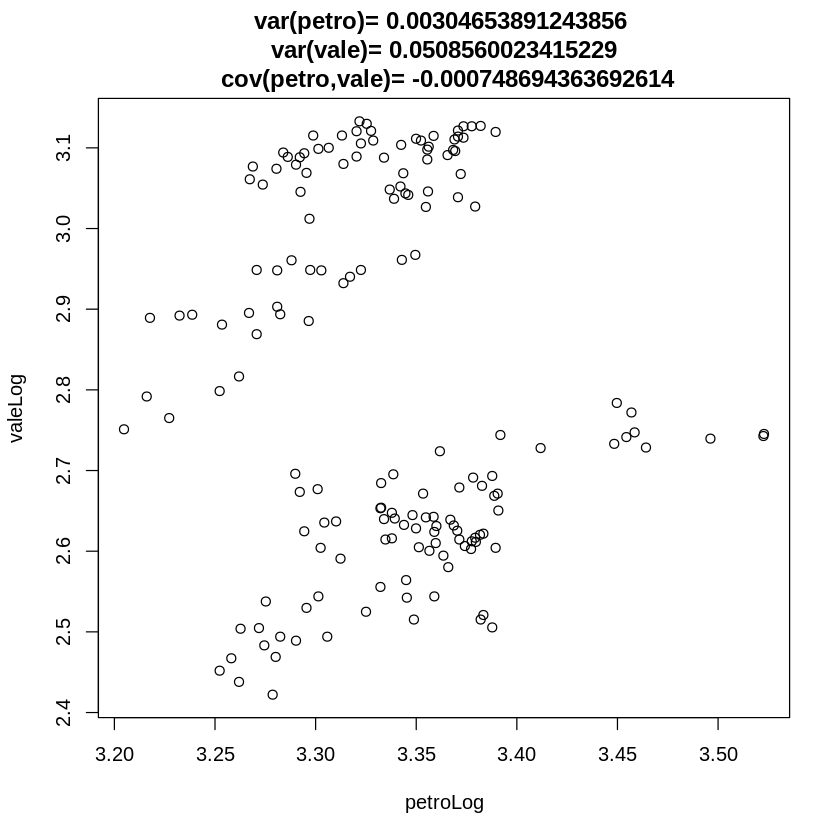

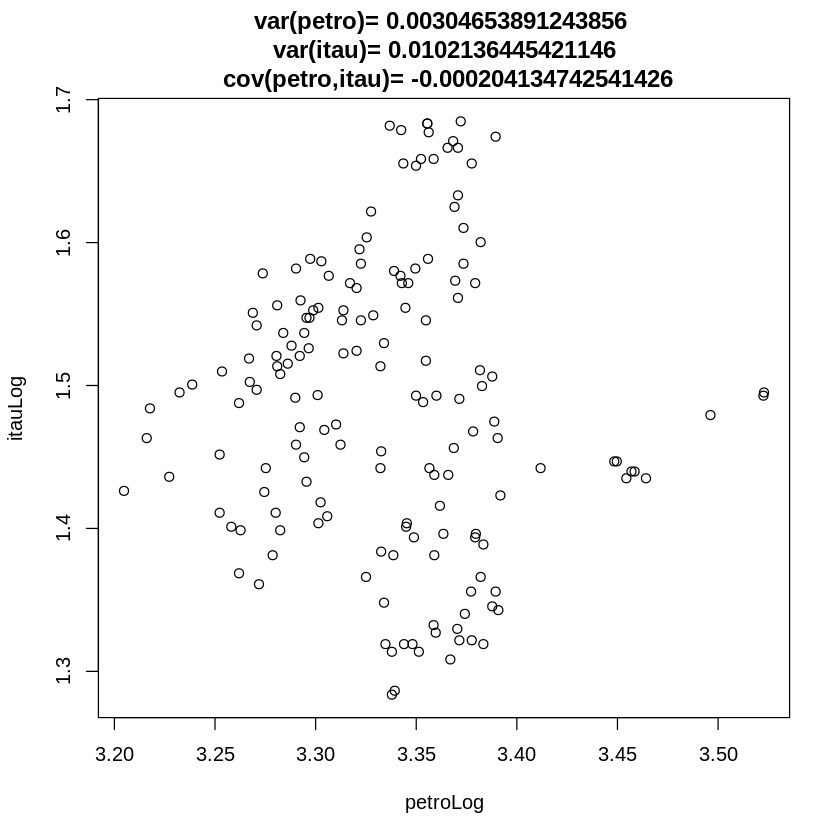

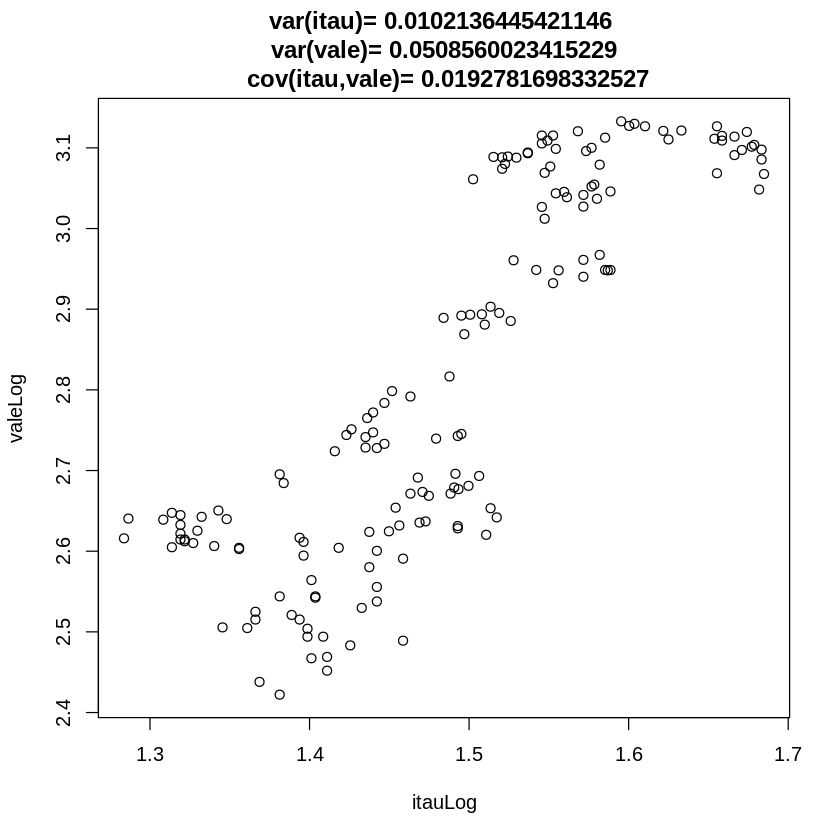

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

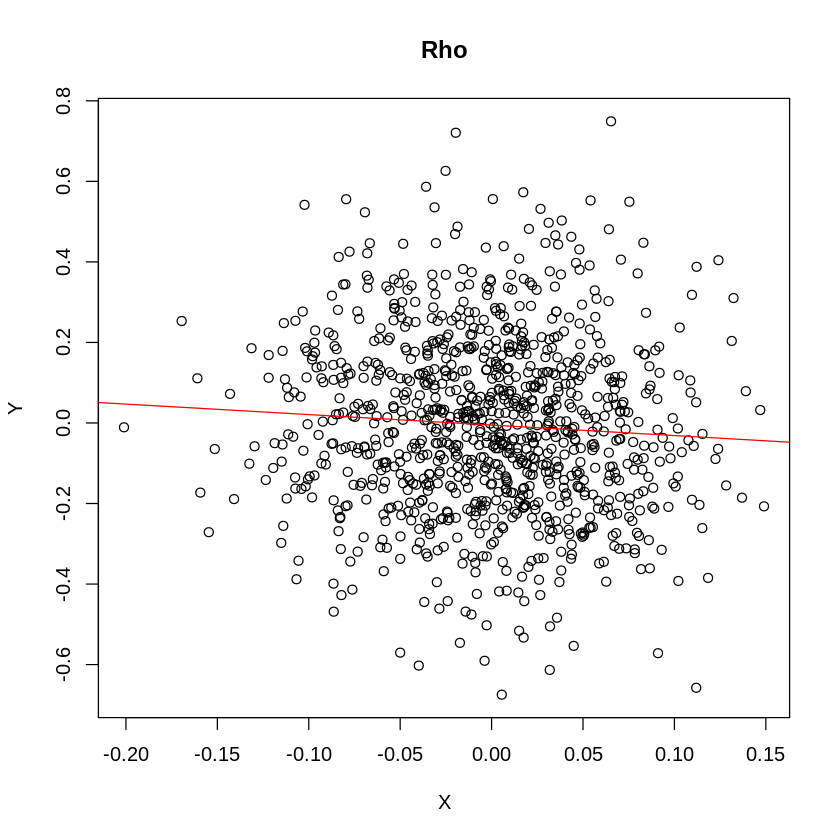

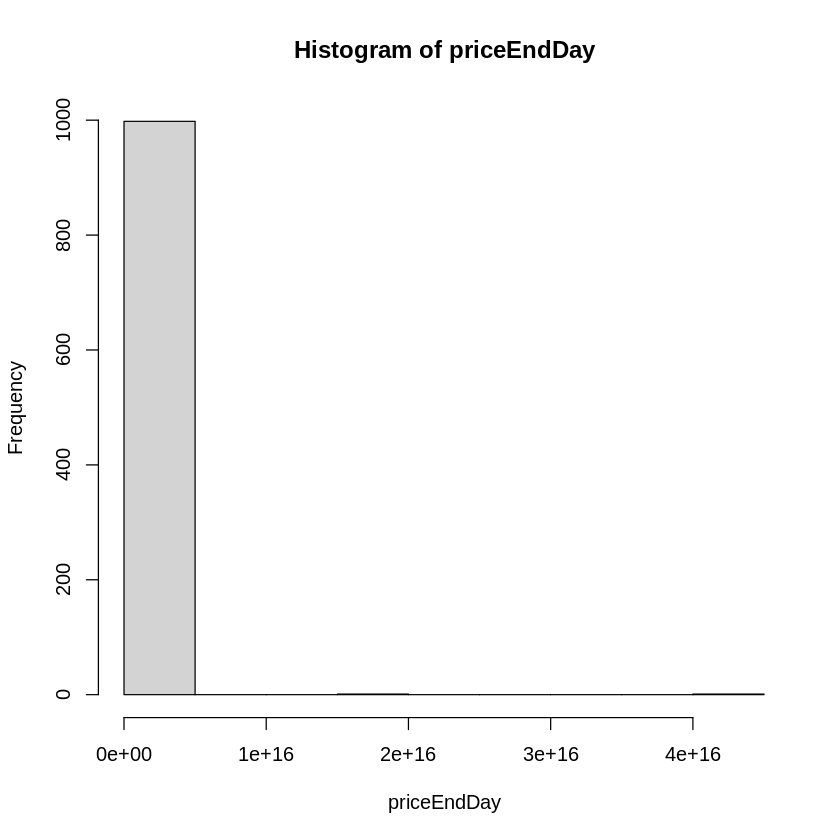

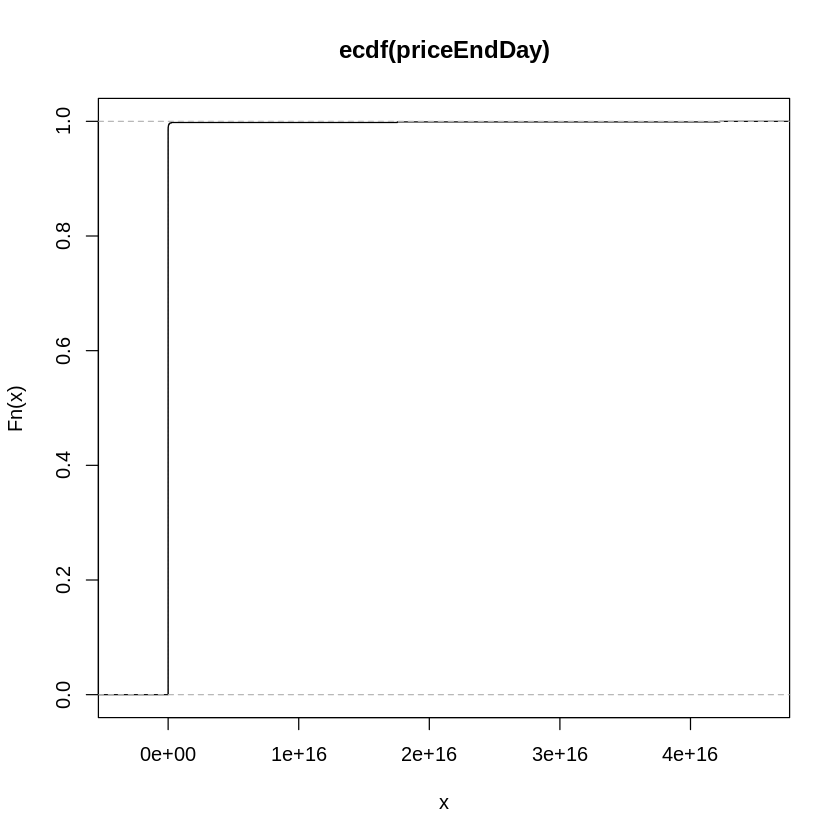

In [15]:
q2(1,1,1,30)